# Introduction. 

In this project i applied supervised machine learning models to the breast cancer dataset to determine which of the model is most efficient for prediciting bening and malignant samples. 

In [3]:
import numpy as np
import warnings
from collections import Counter
import pandas as pd
import random 

# DATA ANALYSIS

Inorder to analyze this data, i did the following
1. I read in the data as a dataframe using pandas and viewed the first 10 rows of the data
2. I checked the data types using df.types() method and discovered that all of them are integers except the bare nuclei feature
3. Checked how many non null values are available using the df.info() method and it seemed like there were non null values but because object values can be tricked i decided to investigate more.
4. In this step, i applied values_count() method on the bare nuclei and discovered that 16 of the information are question marks(?) instead of a number. 
5. In the step 5, i converted the bare nuclei column to numeric so that the wrong datas will be interpreted as NAN and then i applied notnull() method to it so that the rows with those nan vlaues will be dropped. This reduced my entire rows of data from 699 to 683.
6. In step 6, i changed the data type of the bare nuclei feature to int64.


In [4]:
#Step 1
df = pd.read_csv("breast__cancer.txt")
print(df.head(10))

        ID  clump-thickness  uniformity-of-cell-size  \
0  1000025                5                        1   
1  1002945                5                        4   
2  1015425                3                        1   
3  1016277                6                        8   
4  1017023                4                        1   
5  1017122                8                       10   
6  1018099                1                        1   
7  1018561                2                        1   
8  1033078                2                        1   
9  1033078                4                        2   

   uniformity-of-cell-shape  marginal adhension  single epi cell size  \
0                         1                   1                     2   
1                         4                   5                     7   
2                         1                   1                     2   
3                         8                   1                     3   
4                 

In [5]:
#Step 2
df.dtypes
df.shape

(699, 11)

In [6]:
#Step 3
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                          699 non-null int64
clump-thickness             699 non-null int64
uniformity-of-cell-size     699 non-null int64
uniformity-of-cell-shape    699 non-null int64
marginal adhension          699 non-null int64
single epi cell size        699 non-null int64
bare nuclei                 699 non-null object
bland chromatin             699 non-null int64
Normal Nucleoli             699 non-null int64
mitoses                     699 non-null int64
class                       699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


In [7]:
#Step 4
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import missingno as msno
print(msno.bar(df))


print(df["bare nuclei"].value_counts())

AxesSubplot(0.125,0.11;0.775x0.77)
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare nuclei, dtype: int64


In [8]:
#Step 5
cell_df = df[pd.to_numeric(df['bare nuclei'], errors='coerce').notnull()]
print(cell_df["bare nuclei"].value_counts())


cell_df.shape

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare nuclei, dtype: int64


(683, 11)

In [9]:
#Step 6
cell_df['bare nuclei'] = cell_df.loc[ :,'bare nuclei'].astype('int64')
cell_df.dtypes

C:\Users\tosco\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ID                          int64
clump-thickness             int64
uniformity-of-cell-size     int64
uniformity-of-cell-shape    int64
marginal adhension          int64
single epi cell size        int64
bare nuclei                 int64
bland chromatin             int64
Normal Nucleoli             int64
mitoses                     int64
class                       int64
dtype: object

In [10]:
cell_df = cell_df.drop(['ID'],axis= 1)
print(cell_df.head())

   clump-thickness  uniformity-of-cell-size  uniformity-of-cell-shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   marginal adhension  single epi cell size  bare nuclei  bland chromatin  \
0                   1                     2            1                3   
1                   5                     7           10                3   
2                   1                     2            2                3   
3                   1                     3            4                3   
4                   3                     2            1                3   

   Normal Nucleoli  mitoses  class  
0                1        1      2  
1                2      

# DATA VISUALIZATION

This part covers the data exploration steps i took. The explanation of the steps are as follows:

7. In step 7 i simply made a copy of the cell_df dataframe so that i can retain the copy while manipulating the df_vis dataframe i created. 

8. I needed to change the class feature from an int value to object/string value so i specify it as my hue value when making my scatter plot using seaborn. The code snippet in step 8 help me achieve that.

9. In Step 9, I made a simple bar plot to show how the number of bening samples differ from that of malignant samples. As shown, the bening sample seems twice greater than the malignant sample.

10. In step 10, i tried to find out the relationship between the features. As shown in the figure, Obviously, their is no association between most of the features. Only very few features had moderate positive correlation between them. In terms of the form, in general, i think the form should be non-linear because most of the relationships had no form of association.

11. It is always a good practice to standardize/normalize data before applying dimension reduction. So in this step, i tried to achieve using the standard scalar module.

12. In this step, i applied PCA to the standardized data set. As shown, PCA did not do a very good job in seperating the data. I think the reason should be because the PCA used is a linear dimension reduction technique. 

13. In this step, I applied a non-linear dimension reduction technique in this case tsne to the data set and as shown, it did a better job in seperating the dataset when compared to what PCA. So indeed we can conclude that our data set has a non-linear structure. 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline
#plt.rcdefaults()

In [12]:
#Step 7
df_vis = cell_df.copy()

In [13]:
#step 8

def label(element):
    if element == 2:
        return 'Bening'
    else:
        return 'Malignant'
    
class_value = df_vis['class'].map(label)
df_vis['class']= class_value

print(df_vis.head(10))


   clump-thickness  uniformity-of-cell-size  uniformity-of-cell-shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   
5                8                       10                        10   
6                1                        1                         1   
7                2                        1                         2   
8                2                        1                         1   
9                4                        2                         1   

   marginal adhension  single epi cell size  bare nuclei  bland chromatin  \
0                   1                     2            1                3   
1                   5                     

444
239


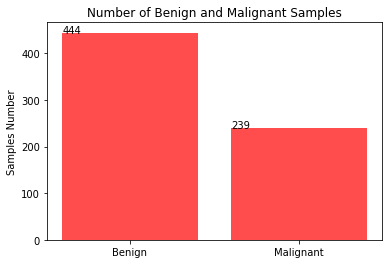

In [14]:
#step 9 
Bening_value = df_vis[df_vis["class"]== "Bening"].shape[0]
Malignant_value = df_vis[df_vis["class"]== "Malignant"].shape[0]
print(Bening_value )
print(Malignant_value)

xlocs, xlabs = plt.xticks()
objects = ('Benign', 'Malignant')
bar_position = np.arange(len(objects))
bar_height = [Bening_value,Malignant_value]

bars = plt.bar(bar_position, bar_height, align='center', alpha=0.7, color = 'red')
plt.xticks(bar_position, objects)
plt.ylabel('Samples Number')
plt.title('Number of Benign and Malignant Samples')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.005, yval)
plt.show()

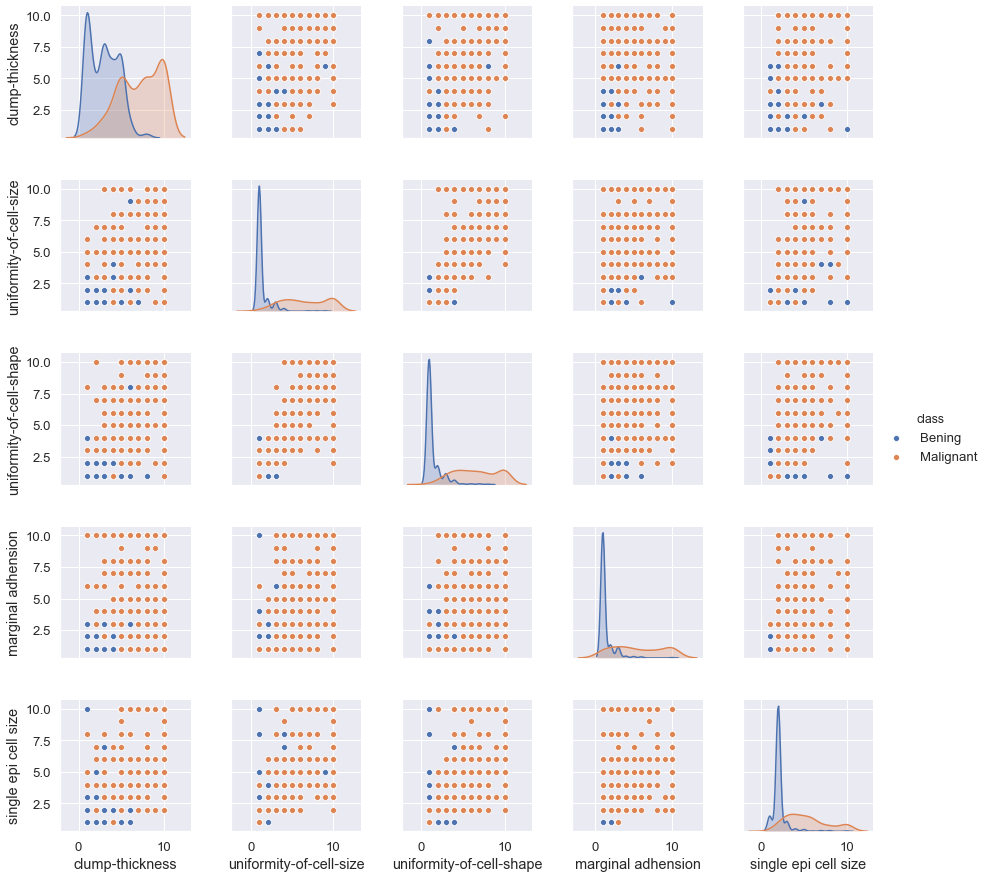

In [15]:
#Step 10 
sns.set()
with sns.plotting_context("notebook", font_scale=1.2):
    sns.pairplot(df_vis,vars=['clump-thickness', 'uniformity-of-cell-size', 'uniformity-of-cell-shape', 'marginal adhension', 'single epi cell size'],hue='class')

plt.show()

In [16]:
#step 11 (data standardization)
from sklearn.preprocessing import StandardScaler
#Seperating out the features
x = np.array(df_vis.drop(['class'],axis= 1))

# Seperating out the target
Y = np.array(df_vis['class'])

#Standardizing the features 
X = StandardScaler().fit_transform(x)
# print(X[0:5])

[0.65549993 0.08621632 0.05991692]


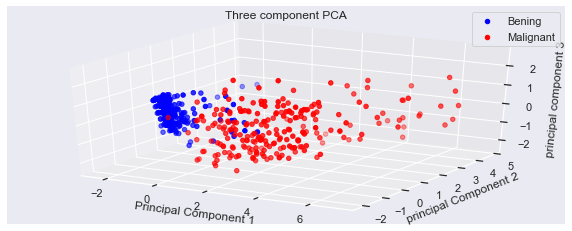

In [17]:
# step 12 
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3' ])
print(pca.explained_variance_ratio_)

new_df = np.array(principalDf)
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_df[Y == 'Bening'][:, 0], new_df[Y == 'Bening'][:, 1],new_df[Y == 'Bening'][:, 2], color='blue', label='Bening')
ax.scatter(new_df[Y == 'Malignant'][:, 0], new_df[Y == 'Malignant'][:, 1], new_df[Y == 'Malignant'][:, 2], color='red', label='Malignant')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('principal Component 2')
ax.set_zlabel('principal component 3')
plt.title("Three component PCA")
plt.legend();

[[ 0.19790469 -0.70221201 -0.74177362 ... -0.18182716 -0.61292736
  -0.34839971]
 [ 0.19790469  0.27725185  0.26278299 ... -0.18182716 -0.28510482
  -0.34839971]
 [-0.51164337 -0.70221201 -0.74177362 ... -0.18182716 -0.61292736
  -0.34839971]
 ...
 [ 0.19790469  2.23617957  2.2718962  ...  1.86073779  2.33747554
   0.22916583]
 [-0.15686934  1.58320366  0.93248739 ...  2.67776377  1.02618536
  -0.34839971]
 [-0.15686934  1.58320366  1.6021918  ...  2.67776377  0.37054027
  -0.34839971]]
[t-SNE] Computing 115 nearest neighbors...
[t-SNE] Indexed 683 samples in 0.000s...
[t-SNE] Computed neighbors for 683 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 683 / 683
[t-SNE] Mean sigma: 0.357416
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.865860
[t-SNE] KL divergence after 300 iterations: 0.643534


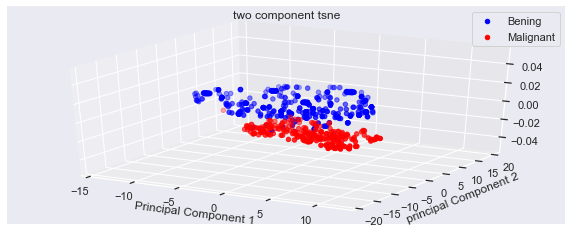

In [18]:
#step 13

from sklearn.manifold import TSNE
import seaborn as sns
print(X)
tsne = TSNE(n_components=2, verbose=1, perplexity=38, n_iter=300)
tsne_results = tsne.fit_transform(X)
principalDf = pd.DataFrame(data = tsne_results 
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf.head(10))


new_df = np.array(principalDf)
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(new_df[Y == 'Bening'][:, 0], new_df[Y == 'Bening'][:, 1], color='blue', label='Bening')
ax.scatter(new_df[Y == 'Malignant'][:, 0], new_df[Y == 'Malignant'][:, 1], color='red', label='Malignant')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('principal Component 2')
plt.title("two component tsne")
plt.legend();

# MODEL SELECTION

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import roc_curve, auc
from scipy import interp

### WITHOUT STANDARDIZATION

In [20]:
df_model = cell_df.copy() 

X = np.array(df_model.drop(['class'],axis= 1))
y = np.array(df_model['class'])

acc_log_reg = []
acc_SVM = []
acc_MLP = []
acc_random_forest = []
acc_NB = []
acc_KNN = []
acc_DTC =[]

value = [2,3,4,5]
for c_value in value:

    temp_1 = cross_val_score(KNeighborsClassifier(n_neighbors=5),X, y, cv=c_value)
    acc_KNN = np.append(acc_KNN, np.mean(temp_1))
    
    temp_2 = cross_val_score(LogisticRegression(random_state=10, solver = 'liblinear'), X , y,cv=c_value)
    acc_log_reg = np.append(acc_log_reg, np.mean(temp_2))
   
    temp_3 = cross_val_score(SVC(random_state=10, gamma= 'auto', kernel='rbf'),X , y,cv=c_value)
    acc_SVM = np.append(acc_SVM, np.mean(temp_3))
  
    temp_4 = cross_val_score(MLPClassifier(hidden_layer_sizes=[200,100,50,100,200],random_state=10), X, y, cv=c_value)
    acc_MLP = np.append(acc_MLP, np.mean(temp_4))
   
    temp_5 = cross_val_score(RandomForestClassifier(random_state=10, n_estimators = 10, criterion= 'entropy'), X , y, cv=c_value)
    acc_random_forest = np.append(acc_random_forest, np.mean(temp_5 ))

    temp_6 = cross_val_score(GaussianNB(),X , y, cv=c_value)
    acc_NB= np.append(acc_NB, np.mean(temp_6))

    temp_7 = cross_val_score(DecisionTreeClassifier(criterion = 'entropy', random_state = 10), X,y,cv =c_value)
    acc_DTC = np.append(acc_DTC, np.mean(temp_7))
print("KNN = " + str( acc_KNN))
print("Logistic_regression = " + str(acc_log_reg))
print("SVM = " + str(acc_SVM))
print("Neural_network = " + str(acc_MLP))
print("RandomForest = " + str(acc_random_forest))
print("GaussianNB = " + str(acc_NB))
print("DecisionTree = " + str(acc_DTC))


KNN = [0.97073451 0.96489296 0.96635707 0.96781833]
Logistic_regression = [0.96195829 0.96782982 0.96490368 0.96348202]
SVM = [0.94732555 0.95758302 0.95172859 0.95032171]
Neural_network = [0.96487369 0.95612747 0.95902993 0.96056231]
RandomForest = [0.96633997 0.95463972 0.96342449 0.95178156]
GaussianNB = [0.95316493 0.95903213 0.96049192 0.95905921]
DecisionTree = [0.95462263 0.92974728 0.93410733 0.93263044]


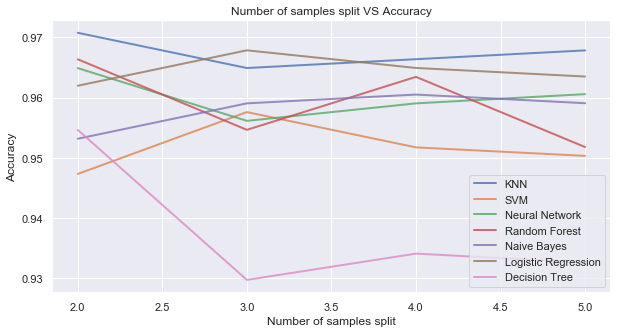

In [21]:
fig = plt.figure(figsize=(10, 5))
ax= fig.add_subplot(111)
ax.plot(value[0:4], acc_KNN, label='KNN', lw=2, alpha=.8)
ax.plot(value[0:4], acc_SVM, label='SVM', lw=2, alpha=.8)
ax.plot(value[0:4], acc_MLP, label='Neural Network', lw=2, alpha=.8)
ax.plot(value[0:4], acc_random_forest, label='Random Forest', lw=2, alpha=.8)
ax.plot(value[0:4], acc_NB, label='Naive Bayes', lw=2, alpha=.8)
ax.plot(value[0:4], acc_log_reg, label='Logistic Regression', lw=2, alpha=.8)
ax.plot(value[0:4], acc_DTC, label='Decision Tree', lw=2, alpha=.8)
ax.set_xlabel('Number of samples split')
ax.set_ylabel('Accuracy')
plt.title('Number of samples split VS Accuracy')
plt.legend(loc="lower right")

plt.show()

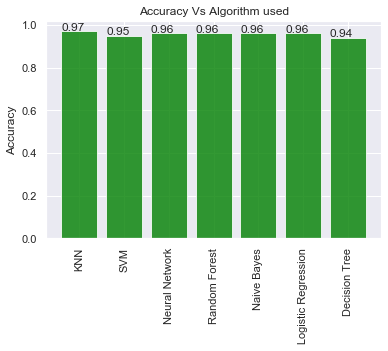

In [22]:
acc_KNN__= round(np.mean(acc_KNN),2)
acc_SVM__ =  round(np.mean(acc_SVM),2)
acc_MLP__ = round(np.mean(acc_MLP),2)
acc_random_forest__ = round(np.mean(acc_random_forest),2)
acc_NB__ = round(np.mean(acc_NB),2)
acc_log_reg__ = round(np.mean(acc_log_reg),2)
acc_DTC__ = round(np.mean(acc_DTC),2)
xlocs, xlabs = plt.xticks()
objects = ('KNN', 'SVM', 'Neural Network', 'Random Forest', 'Naive Bayes', 'Logistic Regression','Decision Tree' )
bar_position = np.arange(len(objects))
bar_height = [acc_KNN__,acc_SVM__, acc_MLP__, acc_random_forest__,acc_NB__, acc_log_reg__, acc_DTC__]

bars = plt.bar(bar_position, bar_height, align='center', alpha=0.8, color = 'green')
plt.xticks(bar_position, objects, rotation=90)
#plt.xticklabels(bar_position, rotation= 90)
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Algorithm used')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.show()

In [33]:
acc_KNN_mean = round(np.mean(acc_KNN),2)
acc_SVM_mean =  round(np.mean(acc_SVM),2)
print(acc_KNN_mean)
print(acc_SVM_mean)

0.97
0.95


### WITH STANDARDIZATION

In [36]:
df_model_2 = cell_df.copy() 

x = np.array(df_model_2.drop(['class'],axis= 1))
y = np.array(df_model_2['class'])

X = StandardScaler().fit_transform(x)
print(X[0:5])


acc_log_reg = []
acc_SVM = []
acc_MLP = []
acc_random_forest = []
acc_NB = []
acc_KNN = []
acc_DTC =[]

value = [2,3,4,5]
for c_value in value:

    temp_1 = cross_val_score(KNeighborsClassifier(),X, y, cv=c_value)
    acc_KNN = np.append(acc_KNN, np.mean(temp_1))
    
    temp_2 = cross_val_score(LogisticRegression(random_state=10, solver = 'liblinear'), X , y,cv=c_value)
    acc_log_reg = np.append(acc_log_reg, np.mean(temp_2))
   
    temp_3 = cross_val_score(SVC(random_state=10, gamma= 'auto', kernel='rbf'),X , y,cv=c_value)
    acc_SVM = np.append(acc_SVM, np.mean(temp_3))
  
    temp_4 = cross_val_score(MLPClassifier(hidden_layer_sizes=[200,100,50,100,200],random_state=10), X, y, cv=c_value)
    acc_MLP = np.append(acc_MLP, np.mean(temp_4))
   
    temp_5 = cross_val_score(RandomForestClassifier(random_state=10, n_estimators = 10, criterion= 'entropy'), X , y, cv=c_value)
    acc_random_forest = np.append(acc_random_forest, np.mean(temp_5 ))

    temp_6 = cross_val_score(GaussianNB(),X , y, cv=c_value)
    acc_NB= np.append(acc_NB, np.mean(temp_6))

    temp_7 = cross_val_score(DecisionTreeClassifier(criterion = 'entropy', random_state = 10), X,y,cv =c_value)
    acc_DTC = np.append(acc_DTC, np.mean(temp_7))
print("KNN = " + str( acc_KNN))
print("Logistic_regression = " + str(acc_log_reg))
print("SVM = " + str(acc_SVM))
print("Neural_network = " + str(acc_MLP))
print("RandomForest = " + str(acc_random_forest))
print("GaussianNB = " + str(acc_NB))
print("DecisionTree = " + str(acc_DTC))


[[ 0.19790469 -0.70221201 -0.74177362 -0.63936553 -0.5556085  -0.69885309
  -0.18182716 -0.61292736 -0.34839971]
 [ 0.19790469  0.27725185  0.26278299  0.75803177  1.69516613  1.77286724
  -0.18182716 -0.28510482 -0.34839971]
 [-0.51164337 -0.70221201 -0.74177362 -0.63936553 -0.5556085  -0.4242175
  -0.18182716 -0.61292736 -0.34839971]
 [ 0.55267873  1.58320366  1.6021918  -0.63936553 -0.10545357  0.12505369
  -0.18182716  1.3540079  -0.34839971]
 [-0.15686934 -0.70221201 -0.74177362  0.05933312 -0.5556085  -0.69885309
  -0.18182716 -0.61292736 -0.34839971]]
KNN = [0.9721965  0.96636139 0.96635707 0.9663801 ]
Logistic_regression = [0.97220079 0.9648994  0.96781906 0.96786158]
SVM = [0.96634426 0.96928536 0.96635707 0.96492025]
Neural_network = [0.96633568 0.96197542 0.96050912 0.96200054]
RandomForest = [0.96780196 0.9575637  0.96342449 0.95178156]
GaussianNB = [0.95316493 0.95903213 0.96049192 0.95905921]
DecisionTree = [0.95462263 0.92974728 0.93556932 0.93263044]


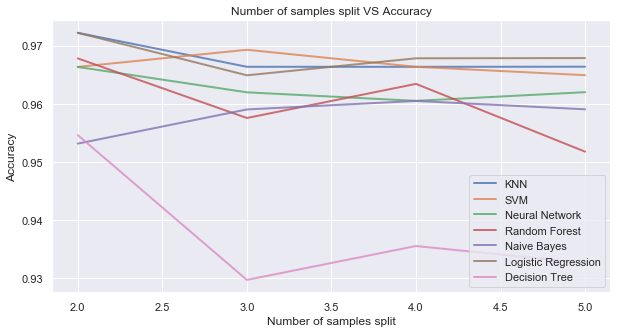

In [37]:
fig = plt.figure(figsize=(10, 5))
ax= fig.add_subplot(111)
ax.plot(value[0:4], acc_KNN, label='KNN', lw=2, alpha=.8)
ax.plot(value[0:4], acc_SVM, label='SVM', lw=2, alpha=.8)
ax.plot(value[0:4], acc_MLP, label='Neural Network', lw=2, alpha=.8)
ax.plot(value[0:4], acc_random_forest, label='Random Forest', lw=2, alpha=.8)
ax.plot(value[0:4], acc_NB, label='Naive Bayes', lw=2, alpha=.8)
ax.plot(value[0:4], acc_log_reg, label='Logistic Regression', lw=2, alpha=.8)
ax.plot(value[0:4], acc_DTC, label='Decision Tree', lw=2, alpha=.8)
ax.set_xlabel('Number of samples split')
ax.set_ylabel('Accuracy')
plt.title('Number of samples split VS Accuracy')
plt.legend(loc="lower right")
plt.show()

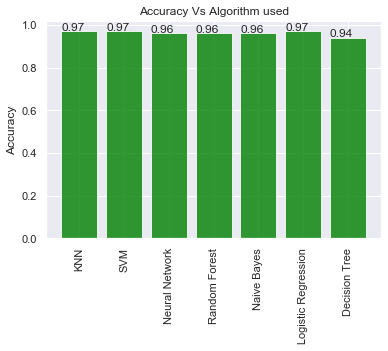

In [42]:
acc_KNN_= round(np.mean(acc_KNN),2)
acc_SVM_ =  round(np.mean(acc_SVM),2)
acc_MLP_ = round(np.mean(acc_MLP),2)
acc_random_forest_ = round(np.mean(acc_random_forest),2)
acc_NB_ = round(np.mean(acc_NB),2)
acc_log_reg_ = round(np.mean(acc_log_reg),2)
acc_DTC_ = round(np.mean(acc_DTC),2)

objects = ('KNN', 'SVM', 'Neural Network', 'Random Forest', 'Naive Bayes', 'Logistic Regression','Decision Tree' )
bar_position = np.arange(len(objects))
bar_height = [acc_KNN_,acc_SVM_, acc_MLP_, acc_random_forest_,acc_NB_, acc_log_reg_, acc_DTC_]
xlocs, xlabs = plt.xticks()

bars = plt.bar(bar_position, bar_height, align='center', alpha=0.8, color = 'green')
plt.xticks(bar_position, objects, rotation=90)
#plt.xticklabels(bar_position, rotation= 90)
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Algorithm used')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
    
plt.show()

# MODEL EVALUATION

In [60]:
#find the average false negative confusion matrix value for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df_model_3 = df_vis.copy()  
x = np.array(df_model_3.drop(['class'],axis= 1))
# print(x.shape)
y = np.array(df_model_3['class'])

X = StandardScaler().fit_transform(x)
#print(X[0:5])
def Average(lst): 
    return sum(lst) / len(lst)
def recall(num1, num2):
    return num1/(num1 + num2)
def precision (num1, num2):
    return num1/(num1 + num2)
def f1_score (num1,num2):
    return (num1 + num2) /2

states= np.arange(10,15)
false_negative_numbers =[]
false_positive_numbers =[]
true_negative_numbers =[]
true_positive_numbers =[]

for s in states:  
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = s)
    clf = LogisticRegression(random_state=0, solver='liblinear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred, labels=['Malignant','Bening'])
    np.set_printoptions(precision=2)
    tn, fp, fn, tp = (confusion_matrix(y_test, y_pred, labels=['Malignant','Bening'])).ravel()
    true_negative_numbers.append(tn)
    false_positive_numbers.append(fp)
    false_negative_numbers.append(fn)
    true_positive_numbers.append(tp)
mean_tn = Average(true_negative_numbers)
mean_fp = Average(false_positive_numbers)
mean_fn = Average(false_negative_numbers)
mean_tp = Average(true_positive_numbers) 

# print(mean_tn)
print('fp = ' + str(mean_fp))
print('fn = '+ str(mean_fn))
# print(mean_tp)
# print(cnf_matrix)
# print (classification_report(y_test, y_pred))

malignant_recall_result = recall(mean_tn,mean_fp) 
print('Malignant_recall = ' + str(round(malignant_recall_result,2)))
malignant_precision_result = precision(mean_tn,mean_fn) 
print('Malignant_precision = ' + str(round(malignant_precision_result,2)))
malignant_f1_score = f1_score(malignant_recall_result, malignant_precision_result)
print('Malignant_f1_score = ' +  str(round(malignant_f1_score,2)))
print('\n')
Benign_recall_result = recall(mean_tp,mean_fn) 
print('Benign_recall = ' + str(round(Benign_recall_result,2)))
Benign_precision_result = precision(mean_tp,mean_fp) 
print('Benign_precision = ' + str(round(Benign_precision_result,2)))
Benign_f1_score = f1_score(Benign_recall_result, Benign_precision_result)
print('Benign_f1_score = ' +  str(round(Benign_f1_score,2)))

fp = 3.4
fn = 2.0
Malignant_recall = 0.93
Malignant_precision = 0.96
Malignant_f1_score = 0.95


Benign_recall = 0.98
Benign_precision = 0.96
Benign_f1_score = 0.97


In [61]:
#find the average false negative confusion matrix value for svm regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
df_model_3 = df_vis.copy() 
x = np.array(df_model_3.drop(['class'],axis= 1))
y = np.array(df_model_3['class'])

X = StandardScaler().fit_transform(x)
#print(X[0:5])
def Average(lst): 
    return sum(lst) / len(lst)

states= np.arange(10,15)
false_negative_numbers =[]
false_positive_numbers =[]
true_negative_numbers =[]
true_positive_numbers =[]

for s in states:  
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = s)
    clf =  svm.SVC(gamma='auto', random_state = s, kernel='rbf')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred, labels=['Malignant','Bening'])
    np.set_printoptions(precision=2)
    tn, fp, fn, tp = (confusion_matrix(y_test, y_pred, labels=['Malignant','Bening'])).ravel()
    true_negative_numbers.append(tn)
    false_positive_numbers.append(fp)
    false_negative_numbers.append(fn)
    true_positive_numbers.append(tp)
mean_tn = Average(true_negative_numbers)
mean_fp = Average(false_positive_numbers)
mean_fn = Average(false_negative_numbers)
mean_tp = Average(true_positive_numbers) 

# print(mean_tn)
print('fp = ' + str(mean_fp))
print('fn = '+ str(mean_fn))
# print(mean_tp)
# print(cnf_matrix)
# print (classification_report(y_test, y_pred))

malignant_recall_result = recall(mean_tn,mean_fp) 
print('Malignant_recall = ' + str(round(malignant_recall_result,2)))
malignant_precision_result = precision(mean_tn,mean_fn) 
print('Malignant_precision = ' + str(round(malignant_precision_result,2)))
malignant_f1_score = f1_score(malignant_recall_result, malignant_precision_result)
print('Malignant_f1_score = ' +  str(round(malignant_f1_score,2)))
print('\n')
Benign_recall_result = recall(mean_tp,mean_fn) 
print('Benign_recall = ' + str(round(Benign_recall_result,2)))
Benign_precision_result = precision(mean_tp,mean_fp) 
print('Benign_precision = ' + str(round(Benign_precision_result,2)))
Benign_f1_score = f1_score(Benign_recall_result, Benign_precision_result)
print('Benign_f1_score = ' +  str(round(Benign_f1_score,2)))    
print (classification_report(y_test, y_pred))

fp = 1.8
fn = 2.8
Malignant_recall = 0.96
Malignant_precision = 0.95
Malignant_f1_score = 0.96


Benign_recall = 0.97
Benign_precision = 0.98
Benign_f1_score = 0.97
              precision    recall  f1-score   support

      Bening       0.98      0.99      0.98        84
   Malignant       0.98      0.96      0.97        53

    accuracy                           0.98       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



In [ ]:
#find the average false negative confusion matrix value for bayes classifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

df_model_3 = df_vis.copy() 
x = np.array(df_model_3.drop(['class'],axis= 1))
y = np.array(df_model_3['class'])
X = StandardScaler().fit_transform(x)
#print(X[0:5])
states= np.arange(10,15)
false_negative_numbers =[]
for s in states:  
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = s)
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred, labels=['Malignant','Bening'])
    np.set_printoptions(precision=2)
    tn, fp, fn, tp = (confusion_matrix(y_test, y_pred, labels=['Malignant','Bening'])).ravel()
    false_negative_numbers.append(fn)
    
mean_fn = Average(false_negative_numbers)
print(mean_fn)
print (classification_report(y_test, y_pred))


In [66]:
#find the average false negative confusion matrix value for KNN regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

df_model_3 = df_vis.copy() 
x = np.array(df_model_3.drop(['class'],axis= 1))
y = np.array(df_model_3['class'])
X = StandardScaler().fit_transform(x)
#print(X[0:5])
def Average(lst): 
    return sum(lst) / len(lst)

states= np.arange(10,16)
false_negative_numbers =[]
false_positive_numbers =[]
true_negative_numbers =[]
true_positive_numbers =[]

for s in states:  
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = s)
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred, labels=['Malignant','Bening'])
    np.set_printoptions(precision=2)
    tn, fp, fn, tp = (confusion_matrix(y_test, y_pred, labels=['Malignant','Bening'])).ravel()
    true_negative_numbers.append(tn)
    false_positive_numbers.append(fp)
    false_negative_numbers.append(fn)
    true_positive_numbers.append(tp)
mean_tn = Average(true_negative_numbers)
mean_fp = Average(false_positive_numbers)
mean_fn = Average(false_negative_numbers)
mean_tp = Average(true_positive_numbers) 

print(fp)
print(fn)
print('fp = ' + str(mean_fp))
print('fn = '+ str(mean_fn))
print (classification_report(y_test, y_pred))    
malignant_recall_result = recall(mean_tn,mean_fp) 
print('Malignant_recall = ' + str(round(malignant_recall_result,2)))
malignant_precision_result = precision(mean_tn,mean_fn) 
print('Malignant_precision = ' + str(round(malignant_precision_result,2)))
malignant_f1_score = f1_score(malignant_recall_result, malignant_precision_result)
print('Malignant_f1_score = ' +  str(round(malignant_f1_score,2)))
print('\n')
Benign_recall_result = recall(mean_tp,mean_fn) 
print('Benign_recall = ' + str(round(Benign_recall_result,2)))
Benign_precision_result = precision(mean_tp,mean_fp) 
print('Benign_precision = ' + str(round(Benign_precision_result,2)))
Benign_f1_score = f1_score(Benign_recall_result, Benign_precision_result)
print('Benign_f1_score = ' +  str(round(Benign_f1_score,2)))


3
2
fp = 2.6666666666666665
fn = 2.3333333333333335
              precision    recall  f1-score   support

      Bening       0.96      0.98      0.97        81
   Malignant       0.96      0.95      0.95        56

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

Malignant_recall = 0.95
Malignant_precision = 0.95
Malignant_f1_score = 0.95


Benign_recall = 0.97
Benign_precision = 0.97
Benign_f1_score = 0.97


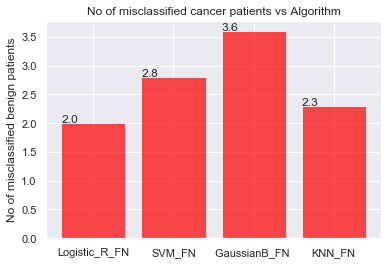

In [23]:
# Show the graph here 
Logistic_R_FN = 2.0
SVM_FN = 2.8
GaussianB_FN = 3.6
KNN_FN = 2.3

objects = ('Logistic_R_FN', 'SVM_FN', 'GaussianB_FN ', 'KNN_FN')
bar_position = np.arange(len(objects))
bar_height = [Logistic_R_FN, SVM_FN, GaussianB_FN, KNN_FN]
xlocs, xlabs = plt.xticks()

bars = plt.bar(bar_position, bar_height, align='center', alpha=0.7, color = 'red')
plt.xticks(bar_position, objects)
plt.ylabel('No of misclassified benign patients')
plt.title('No of misclassified cancer patients vs Algorithm')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.show()

# HYPER-PARAMETER TUNNING 

In [82]:
#tunning support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm

df_model_5 = df_vis.copy() 
x = np.array(df_model_5.drop(['class'],axis= 1))
# print(x.shape)
y = np.array(df_model_5['class'])
# print(y)
X = StandardScaler().fit_transform(x)
# print(X[0:5])
states= np.arange(45,50)
def Average(lst): 
    return sum(lst) / len(lst)

best_p = {}
recall = []
count = 0
for s in states:
    count = count + 1
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = s)
    log_clf =  svm.SVC(gamma='auto', random_state = s, kernel='rbf')
    param_grid = {
                'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'kernel' : ['linear', 'rbf', 'poly'],
                'gamma' : [0.1, 1, 10, 100],
                                }
    CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, cv= 5)
    CV_log_clf.fit(X_train, y_train)
    best_parameters = CV_log_clf.best_params_
    best_p[count]= best_parameters
    y_pred = CV_log_clf.predict(X_test)
    recall_value = recall_score(y_test, y_pred, labels =['Malignant'], average='macro')
    recall.append(recall_value)
best_recall = Average(recall)
print(best_p)
print(recall)
print(best_recall)

# print('The best parameters for using this model is', best_parameters)

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 20)
# log_clf =  svm.SVC(C = 1, gamma=0.1, degree= 0, kernel='rbf')
# log_clf.fit(X_train, y_train)
# y_pred = log_clf.predict(X_test)
# cnf_matrix = confusion_matrix(y_test, y_pred, labels=['Malignant','Bening'])
# # recall_value = recall_score(y_test, y_pred, average='macro')
# print(cnf_matrix)
# print (classification_report(y_test, y_pred))

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    3.1s finished
C:\Users\tosco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 84 candidates, totalling 420 fits
{1: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}, 2: {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}, 3: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, 4: {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}, 5: {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}}
[0.9565217391304348, 0.9622641509433962, 0.9795918367346939, 0.9791666666666666, 0.9629629629629629]
0.9681014712876308


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    2.6s finished


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 40)
log_clf =  svm.SVC(C = 1, gamma=0.1, kernel='linear')
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred, labels=['Malignant','Bening'])
# recall_value = recall_score(y_test, y_pred, average='macro')
print(cnf_matrix)
print (classification_report(y_test, y_pred))

[[47  3]
 [ 1 86]]
              precision    recall  f1-score   support

      Bening       0.97      0.99      0.98        87
   Malignant       0.98      0.94      0.96        50

    accuracy                           0.97       137
   macro avg       0.97      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137

